In [2]:
# 导入一些库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
x1 = np.array([1,1])
x2 = np.array([[1,1],[2,2]])

In [4]:
np.array([[1,1],[2,2]])

array([[1, 1],
       [2, 2]])

In [27]:
distance(x1, x2)

array([0, 2])

In [26]:
def distance(x1, x2):
    '''
    本函数用于计算两个点之间的欧氏距离的平方。
    主要注意的是：这里不用求出具体的欧式距离，只要求出平方即可，因为我们是用来做距离比较的，不用求出具体的距离值。
    参数：
        x1: 第一个点的特征取值
        x2: 第二个点的特征取值
    返回值：
        返回两个点之间的距离
    '''
    d = np.diag(np.dot((x1 - x2), (x1 - x2).T))
    return d

In [79]:
def compute_k_min_idx(array, k):
    lst = array.tolist()
    idx_list = []
    for i in range(k):
        idx = lst.index(min(lst))
        idx_list.append(idx)
        lst[idx] = np.inf
    return idx_list

In [102]:
def vote(array):
    series = pd.Series(array)
    count = series.value_counts()
    label = count.index[0]
    return label

In [103]:
def knn(x_train, y_train, x_test, k):
    '''
    本函数用来使用knn算法对数据进行分类。
    参数
        x_train: 训练集的特征取值
        y_train: 训练集的标签取值
        x_test: 测试集的特征取值
        k: knn算法的近邻参数
    返回值
        返回x_test的预测结果
    '''
    # 找到在x_train中距离x_test各点最近的k个点
    y_test = []
    for x in x_test:
        d = distance(x, x_train)
        idx = compute_k_min_idx(d, k)
        label = vote(y_train[idx])
        y_test.append(label)
        
    return y_test

In [117]:
# 测试
x_train = np.array([[1,1,1,1,1,1,1,1],[0,1,2,3,4,5,6,7]]).T
y_train = np.array([0,0,0,0,1,1,1,1])

In [133]:
x_test = np.array([[2,8],[0,0]])

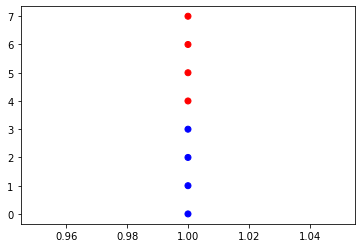

In [131]:
plt.scatter(x_train[:,0],x_train[:,1], c=color)

In [134]:
knn(x_train, y_train, x_test, 1)

[1, 0]

In [132]:
x_test

array([[2, 0],
       [8, 0]])

# 目前存在的问题整理
1. 以上代码没有封装成类
2. 对于数据集的特征没有明确指明列是特征还是行是特征
3. 没有一个比较完成的测试（测试的数据集应该比较有代表性，而且应该通过可视化的手段进行展示以方便理解）

In [ ]:
class knn():
    # 定义类属性
    def __init__(self, x_train, y_train, x_test, k):
        '''
        参数：
            x_train: 训练集的特征取值
            y_train: 训练集的标签取值
            x_test: 测试集的特征取值
            k: knn算法的近邻参数
        '''
        self.x_train = x_train
        self.y_train = y_train
        self.x_test = x_test
        self.k = k


    def distance(x1, x2):
        '''
        本函数用于计算两个点之间的欧氏距离的平方。
        主要注意的是：这里不用求出具体的欧式距离，只要求出平方即可，因为我们是用来做距离比较的，不用求出具体的距离值。
        参数：
            x1: 第一个点的特征取值
            x2: 第二个点的特征取值
        返回值：
            返回两个点之间的距离
        '''
        d = np.diag(np.dot((x1 - x2), (x1 - x2).T))  # 计算欧式距离
        return d


    def compute_k_min_idx(array, k):
        '''
        本函数用于求出最小距离点的索引位置
        参数：
            array: 表示计算得到的距离向量
            k: knn近邻参数
        返回值:
            返回距离最小的k个对应的索引
        '''
        lst = array.tolist()  # 将距离向量转化为list形式，这样方便处理
        idx_list = []  # 创建一个列表用来保存结果
        for i in range(k):
            idx = lst.index(min(lst))  # 找到距离最小点的索引
            idx_list.append(idx)  # 将距离最小点的索引添加到一个存储结果的列表中
            lst[idx] = np.inf  # 将最小距离赋值为无穷大，这样处理可以方便计算次小点

        return idx_list


    def vote(array):
        '''
        本函数用来根据最近k个点的label进行众投处理
        参数：
            array: 表示最近k个点的label取值向量
        返回值：
            返回距离最近的k个点中，出现次数最多的一个label
        '''
        series = pd.Series(array)  # 转化成pd.Series形式方便进行处理
        count = series.value_counts()  # 统计各个label取值出现的次数
        label = count.index[0]  # 找到出现次数最多的那个label
        return label

    
    def knn(x_train, y_train, x_test, k):
        '''
        本函数用来使用knn算法对数据进行分类。
        参数
            x_train: 训练集的特征取值
            y_train: 训练集的标签取值
            x_test: 测试集的特征取值
            k: knn算法的近邻参数
        返回值
            返回x_test的预测结果
        '''
        # 找到在x_train中距离x_test各点最近的k个点
        y_test = []  # 创建一个list用来保存预测结果
        for x in x_test:  # 遍历测试集中的每一个样本
            d = distance(x, x_train)  # 计算训练集中各点到目标样本点的距离
            idx = compute_k_min_idx(d, k)  # 找到距离目标样本点最近的k个点
            label = vote(y_train[idx])  # 根据最近k个的label取值进行众投
            y_test.append(label)  # 添加预测结果到存放结果的list中
            
        return y_test